### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Transformation

- Creating new features from existing features
- Trimming Columns
- Handling ordinal and nominal categorical features
- Feature Selection

## Setting Environment

In [1]:
import pandas as pd
import numpy as np

## Importing Data

In [2]:
%%time
info_content_df = pd.read_hdf('../data/interim/Info_Content.h5', key='info_content')
info_userdata_df = pd.read_hdf('../data/interim/Info_UserData.h5', key='info_userdata')
log_problem_df = pd.read_hdf('../data/interim/Log_Problem.h5', key='log_problem')

Wall time: 5.94 s


In [3]:
info_content_df.head()

,content_pretty_name,difficulty,learning_stage
ucid,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,1,1
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,1,1
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,1,1
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,1,1
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,1,1


In [4]:
info_userdata_df.head()

,points,badges_cnt,date_login,user_grade,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,gender_female,...,user_city_ml,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty
uuid,,,,,,,,,,,,,,,,,,,,,
wH1/Qs32k0Ti18bqWb1PxGfnveo4530CBZTZ/y7uW3k=,32769,6,2018-08-01,6,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
uKFRoPy+AIJ+cYGFyz7Xx9IyLYbWXDWnsjibDxd5UoU=,50279,11,2018-08-01,5,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7bYGewVJB5Bs3b5LRfSdQtQ0HZIH2ehgLHoqRJo7qVo=,51600,10,2018-08-01,5,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
q9jfYP8EOHcoHIMy2CUdZ9Ce6S5KOvXNl5UmJpRt1gs=,22170,2,2018-08-01,5,1,False,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
XcgNk5O4+8zfK4wKJHhb7HXK7hySUZ1OyZdGDBCmtZA=,44435,5,2018-08-01,5,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
log_problem_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,date_attempt
upid,,,,,,,,,,,,,,
2Q787l3L0G7f5P0iSWUE4hCfJfYo9uHL4pWV1U45JoQ=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,1,1,True,10,1,0,False,NaN,NaN,0,2018-08-01
/Wgjdl2BsldHZDdXXvzwGimusaMX548lqV2b7PgwXAs=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,1,1,True,10,1,0,False,NaN,NaN,0,2018-08-01
9Ksy3bdm0HTi0D+cdKSBKDQJjo5GNahep91FqHUrpts=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2,1,True,8,1,0,False,NaN,NaN,0,2018-08-01
hYmhOfMMKaQNTrGze5TdATN0HNGJUEjDIYQaocuD4QY=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2,1,True,6,1,0,False,NaN,NaN,0,2018-08-01
VMScsPmyKXsk5k7+abPqyEbDFRSsCE2XZs5lMKHQHEM=,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,3,1,True,7,1,0,False,NaN,NaN,0,2018-08-01


## Merging Dataframe

In [6]:
merge_df = log_problem_df.merge(info_userdata_df,how='left',on='uuid')

In [7]:
merge_df = merge_df.merge(info_content_df,how='left',on='ucid')

In [8]:
# preview merge data
merge_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,...,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,content_pretty_name,difficulty,learning_stage
0,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,1,1,True,10,1,0,False,...,0,0,1,0,0,0,0,【基礎】第幾個,1,1
1,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,1,1,True,10,1,0,False,...,0,0,1,0,0,0,0,【基礎】一對一對應數數,1,1
2,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2,1,True,8,1,0,False,...,0,0,1,0,0,0,0,【基礎】一對一對應數數,1,1
3,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2,1,True,6,1,0,False,...,0,0,1,0,0,0,0,【基礎】第幾個,1,1
4,2018-08-01 07:45:00+00:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,3,1,True,7,1,0,False,...,0,0,1,0,0,0,0,【基礎】第幾個,1,1


## Create English translate

## User Data

In [9]:
user_total_sec_taken = merge_df.groupby(['uuid'])[['total_sec_taken']].mean()

In [10]:
user_total_sec_taken = user_total_sec_taken.rename(columns={'total_sec_taken': 'user_total_sec_taken'})

In [11]:
user_total_sec_taken

,user_total_sec_taken
uuid,
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,89.800000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,40.578947
++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,22.856354
++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=,28.314516
++OS9yu6/ZTxCQatV9M1r+ISkFwl90yIczl2roOm12s=,19.666667
...,...
zz9dcPKZWbI6OJRi/C9wrfM4geS9M3Ba4pJtMmVg1aU=,31.466899
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,130.307692
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,129.250000


In [12]:
# Merge with user table
info_userdata_df = info_userdata_df.merge(user_total_sec_taken,how='left',on='uuid')

In [13]:
info_userdata_df

,points,badges_cnt,date_login,user_grade,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,gender_female,...,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_total_sec_taken
uuid,,,,,,,,,,,,,,,,,,,,,
wH1/Qs32k0Ti18bqWb1PxGfnveo4530CBZTZ/y7uW3k=,32769,6,2018-08-01,6,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,50.034934
uKFRoPy+AIJ+cYGFyz7Xx9IyLYbWXDWnsjibDxd5UoU=,50279,11,2018-08-01,5,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,42.375691
7bYGewVJB5Bs3b5LRfSdQtQ0HZIH2ehgLHoqRJo7qVo=,51600,10,2018-08-01,5,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,45.575658
q9jfYP8EOHcoHIMy2CUdZ9Ce6S5KOvXNl5UmJpRt1gs=,22170,2,2018-08-01,5,1,False,0,1,0,1,...,0,0,0,0,1,0,0,0,0,19.846154
XcgNk5O4+8zfK4wKJHhb7HXK7hySUZ1OyZdGDBCmtZA=,44435,5,2018-08-01,5,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,63.794118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uhP9K65OHk3q4XhhjUMxxOot32MTovUbBR3QsIoO8+8=,27362,5,2019-07-31,6,1,False,0,1,0,0,...,0,0,0,0,1,0,0,0,0,NaN
FvLT7596o52eGKmLdwGV3iXu4mKXZ3jJq3EJmeys2dg=,38363,8,2019-07-31,6,0,False,0,0,0,0,...,0,0,0,0,1,0,0,0,0,NaN
9oalk4jyLLqtly+FXWB5IQZ10SEtCfIqKleciuV2pjk=,4875,0,2019-07-31,6,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [22]:
info_userdata_df.shape

(72758, 31)

In [19]:
info_userdata_df.isna().sum()

points                      0
badges_cnt                  0
date_login                  0
user_grade                  0
has_teacher_cnt             0
is_self_coach               0
has_student_cnt             0
belongs_to_class_cnt        0
has_class_cnt               0
gender_female               0
gender_male                 0
user_city_chc               0
user_city_cy                0
user_city_hc                0
user_city_hlc               0
user_city_ilc               0
user_city_kh                0
user_city_kl                0
user_city_km                0
user_city_lj                0
user_city_ml                0
user_city_ntct              0
user_city_ntpc              0
user_city_phc               0
user_city_ptc               0
user_city_tc                0
user_city_tn                0
user_city_tp                0
user_city_ttct              0
user_city_ty                0
user_total_sec_taken    38337
dtype: int64

In [24]:
38337/72758

0.5269111300475549

## Create

In [41]:
highest_user_level = merge_df.groupby(['uuid','ucid'])[['level','total_sec_taken']].max()
highest_user_level = merge_df.groupby(['uuid','ucid']).agg(highest_level=('level','max'), 
                                            average_time_taken= ('total_sec_taken','mean'),
                                                          sum_time_taken= ('total_sec_taken','sum')).reset_index()

In [42]:
highest_user_level

,uuid,ucid,highest_level,average_time_taken,sum_time_taken
0,++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,1,89.800000,898
1,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,eJs/Pql/Xui+9mjL0q4CwHI/r+w6Bn3tTCt0i6r4xrg=,0,74.250000,297
2,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,hxF+GCZ2kFjuoHOUVj0a6Jn9NbRfydExscjLa0cvxuw=,0,24.571429,172
3,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,m7rxdmifsJ8HxB91x1USFvW7op/ZusrvlAjq/FAmRE8=,0,37.750000,302
4,++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1,14.923077,388
...,...,...,...,...,...
489033,zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,1,10.083333,121
489034,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,4p305X/NqL1Zx9j6BDJEpiQx090kFF3o/LTTGJt5s/E=,1,18.000000,450
489035,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,9OXYxjWigzS5FgP5nZ1y1EAtwQihC19PGhDlRKqK3Pg=,1,22.444444,202
489036,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,EeAQRS+kGarrxqFWxO5U2lJ12zE7xgtIiHO9ojBNYpw=,1,19.000000,95


In [32]:
highest_user_level.describe()

,level
count,489038.000000
mean,0.939406
std,1.091519
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


## Create Date

In [33]:
merge_df.columns

Index(['datetime_attempt', 'uuid', 'ucid', 'problem_number',
       'exercise_problem_repeat_session', 'is_correct', 'total_sec_taken',
       'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_downgrade',
       'is_upgrade', 'level', 'points', 'badges_cnt', 'date_login',
       'user_grade', 'has_teacher_cnt', 'is_self_coach', 'has_student_cnt',
       'belongs_to_class_cnt', 'has_class_cnt', 'gender_female', 'gender_male',
       'user_city_chc', 'user_city_cy', 'user_city_hc', 'user_city_hlc',
       'user_city_ilc', 'user_city_kh', 'user_city_kl', 'user_city_km',
       'user_city_lj', 'user_city_ml', 'user_city_ntct', 'user_city_ntpc',
       'user_city_phc', 'user_city_ptc', 'user_city_tc', 'user_city_tn',
       'user_city_tp', 'user_city_ttct', 'user_city_ty', 'content_pretty_name',
       'difficulty', 'learning_stage'],
      dtype='object')

In [35]:
merge_df['date_login'].dtype

dtype('O')

In [18]:
merge_df['date_login'] - merge_df['datetime_attempt']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## Create Proficiency

In [164]:
log_problem_df.level[log_problem_df['level']<4]

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=    0
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=    0
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=    0
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=    0
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=    1
                                               ..
YW9ic0LNvF8VT64lGCeXV+8LW0yfZk6G+FWUs3BZOK4=    1
E5ptHhadL0CWGKIWrolM5Ovli6khhvp/fu/do/0qUC8=    0
CZGEcAjZmnJWpgcAnwFUFLpAElrIa1GCp6GyTYsPUIA=    0
I87Qgm2jCymIb907izeL0DeZGRkpDetYpPWWKbdDrt8=    0
boVeJmNRnhK2ErAZZ1dNhsQ4uNUTCenC8IIvEdl9XSA=    0
Name: level, Length: 4215241, dtype: int64

In [165]:
def create_proficient_col(row):
    if row['level'] < 4:
        val = 0
    else:
        val = 1
    return val

In [166]:
log_problem_df['is_proficient'] = log_problem_df.apply(create_proficient_col, axis=1)

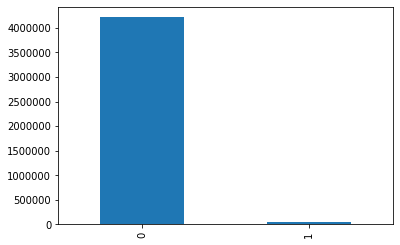

In [167]:
log_problem_df['is_proficient'].value_counts().plot.bar()

In [168]:
log_problem_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient
upid,,,,,,,,,,,,,,
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,0,0,0,0
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,0,0,0,0
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,0,0,0,0
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,0,0,0,0
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,0,1,1,0


In [169]:
log_problem_df[(log_problem_df['uuid']=='wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=') & (log_problem_df['ucid']=='rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=')].sort_values('problem_number')

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient
upid,,,,,,,,,,,,,,
V8rGTtOrMq3i1JVv/XaGNhhPqcBD4PRtYCDC1XhuMfg=,2018-09-13 13:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,2,1,False,53,4,3,True,0,0,0,0
dwbIbdpoSFCHMPUgkO+d1QZ2QZrd5V0euKYWLkTE0Is=,2018-09-13 13:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,3,2,False,16,2,1,True,0,0,0,0
JBfUhIhivUdBbf++cBdwhqPFKQDV+iQrwU2GrhBE/9Q=,2018-09-13 13:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,4,1,True,21,1,0,False,0,0,0,0
vcOSz4LAzQO+R3yw/t1RR8kXE/KViXH2NCi1qR49TZA=,2018-09-13 13:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,5,1,True,20,1,0,False,0,0,0,0
ukHhfy/F7Zi2YySnGzmM5RbK5UOnf3a0dlB4vL8XquU=,2018-09-13 13:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,6,1,True,14,1,0,False,0,0,0,0
YgLMDTfMs7sh1Iy5Nw4pQ0nr3ua3zKwuyiRCZ6K2Kk8=,2018-09-13 13:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,7,1,True,15,1,0,False,0,0,0,0
ftd83byEkCJP2Rr/X/jbvXh0UcHzb+Vb7F6Tyae+9zY=,2018-09-13 13:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,8,1,False,50,4,3,True,0,0,0,0
STZD5cyjUf3J2AETFRoMb+LREPAPoAY3Cc8b63jV3Qw=,2018-09-13 13:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,9,1,True,8,1,0,False,0,1,1,0
z++U3L0hNm7kprikdIS39agk5cwHJW5NJJhNPgQ6xvs=,2018-09-18 07:45:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,13,1,True,1800,1,0,False,0,0,3,0


In [170]:
log_problem_df.is_proficient.value_counts()

0    4215241
1      57962
Name: is_proficient, dtype: int64

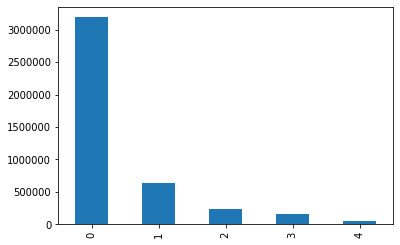

In [171]:
log_problem_df['level'].value_counts().plot.bar()

In [172]:
log_problem_df[log_problem_df['is_proficient']==1].head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient
upid,,,,,,,,,,,,,,
ewgZ6fjRCcCI0gVFiFLWIYlrPvBb/cEt2TnFK3stt4A=,2018-10-30 19:30:00+00:00,jPAjDb5oCnfMGjLie6MLp/mMfhuBNTV2wM5NZyHsCLc=,hUzEsTi50WTbf2tmbhGIyPzIujolDgn1RHd2PkkB1Z4=,22,2,True,21,1,0,False,0,0,4,1
dwbIbdpoSFCHMPUgkO+d1QZ2QZrd5V0euKYWLkTE0Is=,2018-10-25 13:30:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,39,5,True,10,1,0,False,0,0,4,1
EQZFtWcEFdmGkl8QeCmnh2sSpAZigoz3lGNSxcqa7WY=,2018-10-02 13:15:00+00:00,MJquhilXSfEibhJv2xK6lIHSXTY4p8HRlmi5pT17xTw=,k8mqp+KZGRgdlEg/caQhZBQLHh9jgIXK+aTtrCuSd0s=,13,2,True,16,1,0,False,0,1,4,1
KpRXhyZb026Q7SBeQak+yo6t49AyQEPbNYhX44PKO3U=,2018-10-02 21:45:00+00:00,Ul38UoGgxdRosaS+g8DjM+mlxEh0HZw0lkGzL2wphRE=,aQys6A/5FjGwd7dQ0KQ4h/5zmPrM7lbkwj2ZkuhMepo=,15,1,True,4,1,0,False,0,0,4,1
zMNsTbk2NmOQiELRznFQbCYx0gCBCgfWSdd+Pyrmrkc=,2018-10-30 17:15:00+00:00,+tBGrWI5y7W0s7e9FMJTI7sXS9hNZa4m7PLOeQLz0mI=,cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=,38,3,True,15,1,0,False,0,0,4,1


In [173]:
log_problem_df[log_problem_df['is_proficient']==1].head().sort_values('problem_number')

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient
upid,,,,,,,,,,,,,,
EQZFtWcEFdmGkl8QeCmnh2sSpAZigoz3lGNSxcqa7WY=,2018-10-02 13:15:00+00:00,MJquhilXSfEibhJv2xK6lIHSXTY4p8HRlmi5pT17xTw=,k8mqp+KZGRgdlEg/caQhZBQLHh9jgIXK+aTtrCuSd0s=,13,2,True,16,1,0,False,0,1,4,1
KpRXhyZb026Q7SBeQak+yo6t49AyQEPbNYhX44PKO3U=,2018-10-02 21:45:00+00:00,Ul38UoGgxdRosaS+g8DjM+mlxEh0HZw0lkGzL2wphRE=,aQys6A/5FjGwd7dQ0KQ4h/5zmPrM7lbkwj2ZkuhMepo=,15,1,True,4,1,0,False,0,0,4,1
ewgZ6fjRCcCI0gVFiFLWIYlrPvBb/cEt2TnFK3stt4A=,2018-10-30 19:30:00+00:00,jPAjDb5oCnfMGjLie6MLp/mMfhuBNTV2wM5NZyHsCLc=,hUzEsTi50WTbf2tmbhGIyPzIujolDgn1RHd2PkkB1Z4=,22,2,True,21,1,0,False,0,0,4,1
zMNsTbk2NmOQiELRznFQbCYx0gCBCgfWSdd+Pyrmrkc=,2018-10-30 17:15:00+00:00,+tBGrWI5y7W0s7e9FMJTI7sXS9hNZa4m7PLOeQLz0mI=,cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=,38,3,True,15,1,0,False,0,0,4,1
dwbIbdpoSFCHMPUgkO+d1QZ2QZrd5V0euKYWLkTE0Is=,2018-10-25 13:30:00+00:00,wQD1bSIkmgxLkjsap4iGCUNteNnr/tMbtlcvQyK7QcQ=,rrZveAGxgrsKF1qL65AmLVqda8Zbg24xqWyj34qac9c=,39,5,True,10,1,0,False,0,0,4,1


In [174]:
log_problem_df.problem_number[log_problem_df['is_proficient']==1].sort_values()

upid
TlBcCZ3KVAXvy35U+N5HeoXH7A9dtyGAb5MkIlzzmZI=      9
Ksfc+j6tiVr4gw/G/mwqqWWafiQ+W9ELpyi5+2wlZE8=      9
2NoStxYAVswdaEVYVssCTcKoXtvX/ELaQx61KlS/J4s=      9
OE6ac/KSBYPUdQIN5KjVZS1QSxWiKqis6mIYB0s6kV4=      9
hh/TsCdqv8djQ9xuzYoVVu2I0cYQSdI5SohMhgmUNf4=      9
                                               ... 
Q3yAwp6SeWHy4IcQOkcQa0ilkBrtqb/Uc/mdM5P6Kzc=    361
AhtH2M5l+pZYhg2x/hzHqbAC5P7yByGlN75cGE1JguA=    362
bC33ce0WfXIyDotHhoN1ISbuVag/qRZ8GyI+DGig+z0=    363
X2WLGqJHF1LId7XrUdFJKjTycTQmctkmNabCx+BNaak=    364
4uo5ygTFOOabFT+GEwzLrVCu62nMDVYcw2ELQrqwMA0=    365
Name: problem_number, Length: 57962, dtype: int64

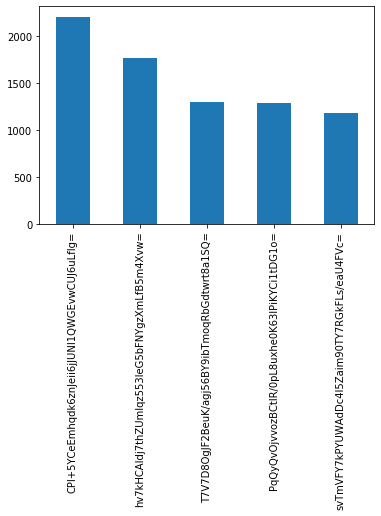

In [175]:
log_problem_df.ucid[log_problem_df['is_proficient']==1].value_counts().head().plot.bar()

In [176]:
correct_rate = merge_df.groupby(['uuid','ucid'])['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()
correct_rate.head()

,uuid,ucid,is_correct
0,++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,0.700000
1,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,eJs/Pql/Xui+9mjL0q4CwHI/r+w6Bn3tTCt0i6r4xrg=,0.000000
2,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,hxF+GCZ2kFjuoHOUVj0a6Jn9NbRfydExscjLa0cvxuw=,0.142857
3,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,m7rxdmifsJ8HxB91x1USFvW7op/ZusrvlAjq/FAmRE8=,0.375000
4,++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,0.576923


In [177]:
correct_rate.sort_values('uuid')

,uuid,ucid,is_correct
0,++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,0.700000
1,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,eJs/Pql/Xui+9mjL0q4CwHI/r+w6Bn3tTCt0i6r4xrg=,0.000000
2,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,hxF+GCZ2kFjuoHOUVj0a6Jn9NbRfydExscjLa0cvxuw=,0.142857
3,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,m7rxdmifsJ8HxB91x1USFvW7op/ZusrvlAjq/FAmRE8=,0.375000
4,++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,0.576923
...,...,...,...
489033,zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,0.916667
489036,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,EeAQRS+kGarrxqFWxO5U2lJ12zE7xgtIiHO9ojBNYpw=,1.000000
489034,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,4p305X/NqL1Zx9j6BDJEpiQx090kFF3o/LTTGJt5s/E=,0.760000
489035,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,9OXYxjWigzS5FgP5nZ1y1EAtwQihC19PGhDlRKqK3Pg=,0.777778


## Merging dataframes

In [178]:
merge_df = log_problem_df.merge(info_userdata_df,how='left',on='uuid')

In [179]:
merge_df = merge_df.merge(info_content_df,how='left',on='ucid')

In [180]:
merge_df.columns

Index(['datetime_attempt', 'uuid', 'ucid', 'problem_number',
       'exercise_problem_repeat_session', 'is_correct', 'total_sec_taken',
       'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_downgrade',
       'is_upgrade', 'level', 'is_proficient', 'points', 'badges_cnt',
       'date_login', 'user_grade', 'has_teacher_cnt', 'is_self_coach',
       'has_student_cnt', 'belongs_to_class_cnt', 'has_class_cnt',
       'gender_female', 'gender_male', 'user_city_chc', 'user_city_cy',
       'user_city_hc', 'user_city_hlc', 'user_city_ilc', 'user_city_kh',
       'user_city_kl', 'user_city_km', 'user_city_lj', 'user_city_ml',
       'user_city_ntct', 'user_city_ntpc', 'user_city_phc', 'user_city_ptc',
       'user_city_tc', 'user_city_tn', 'user_city_tp', 'user_city_ttct',
       'user_city_ty', 'content_pretty_name', 'difficulty', 'learning_stage'],
      dtype='object')

### Proficient rate for each content by user

In [181]:
proficient_rate = merge_df.groupby(['uuid','ucid'])['is_proficient'].apply(lambda x: np.sum(x)/len(x)).reset_index()

In [182]:
proficient_rate.rename(columns={'is_proficient': 'proficient_correct_rate'}, inplace=True)

In [183]:
proficient_rate.head()

,uuid,ucid,proficient_correct_rate
0,++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,0.0
1,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,eJs/Pql/Xui+9mjL0q4CwHI/r+w6Bn3tTCt0i6r4xrg=,0.0
2,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,hxF+GCZ2kFjuoHOUVj0a6Jn9NbRfydExscjLa0cvxuw=,0.0
3,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,m7rxdmifsJ8HxB91x1USFvW7op/ZusrvlAjq/FAmRE8=,0.0
4,++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,0.0


In [184]:
proficient_rate[proficient_rate['proficient_correct_rate']==1]

,uuid,ucid,proficient_correct_rate
99124,B1vqESTv7nmyjOcpXKCSZWq5wkPn+joLXDlkJLkOupw=,tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,1.0
227173,ReIjo4ltt2XTKOVHdEYJBYSVu/ySD4DXn9rAcnQ83WI=,GWrfasljlyqZ+UNT8MRgzzxZcKQFFHyQVMnG7T7Wre8=,1.0
227178,ReIjo4ltt2XTKOVHdEYJBYSVu/ySD4DXn9rAcnQ83WI=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1.0
426872,ry/T3nX2v9KjG1lUAWOHRwkCQFyb/p51nbeR3ACwSpg=,PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,1.0
467284,x4eQe+1lDRgnfXSv+aaxTJ9Itsds3EQeoviO+Oi194U=,9sB9W+3x5hEFUN/pFLPakL+0ubNopXBy3NGjYgRPSI4=,1.0


In [185]:
proficient_rate.describe()

,proficient_correct_rate
count,489038.000000
mean,0.007038
std,0.037416
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [186]:
proficient_rate.shape

(489038, 3)

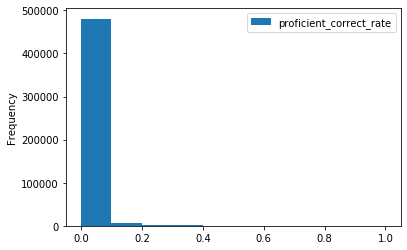

In [187]:
proficient_rate.plot.hist()

In [188]:
log_problem_df = pd.merge(log_problem_df, proficient_rate, how='left', on=['uuid','ucid'])

In [189]:
log_problem_df.head(50)

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient,proficient_correct_rate
0,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,0,0,0,0,0.000000
1,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,0,0,0,0,0.000000
2,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,0,0,0,0,0.000000
3,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,0,0,0,0,0.000000
4,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,0,1,1,0,0.093750
5,2018-09-17 15:15:00+00:00,ixzIMjTPNiat8UVqgmUcOc7GSowwKECSoGVbQoan/hU=,svTmVFY7kPYUWAdDc4l5Zaim90TY7RGkFLs/eaU4FVc=,8,1,True,8,1,0,False,0,0,1,0,0.000000
6,2018-09-28 20:15:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,19,2,True,19,1,0,False,0,0,0,0,0.000000
7,2018-09-06 13:15:00+00:00,HuS9RS64OXkBn/PgZ8HnAaNF9euLaKzbQSxU3dTyWXo=,fuX7RkEntlLtpkaxdMcV4FEBp/WuIaHudOHBjIQN/p0=,4,1,True,43,1,0,False,0,0,0,0,0.000000
8,2018-09-18 18:45:00+00:00,pE0/bKq449WaaGYgfWOjVBTGUROMbnAFDdEFz6ArtOI=,qVt6XIA/cWnMm3kFpC0sZTJ8ad+ZMuYKfkyeLB40vB8=,19,1,True,28,1,0,False,0,0,0,0,0.000000
9,2018-09-14 14:00:00+00:00,6aaiR1AYTmkgKbPBvp4erhbhx5lmeuggP/kS6m24Koo=,PGbCr6wCmzlyPoKCBQv8aOM0NW8HVk4PW+IU4iR6GRI=,8,1,True,25,1,0,False,0,0,0,0,0.000000


## Create Content Correct Rate

In [190]:
content_correct = merge_df.groupby('ucid')['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()
content_correct.head()

,ucid,is_correct
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,0.445545
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,0.568966
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,0.612576
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,0.638341
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,0.570762


In [191]:
content_correct.rename(columns={'is_correct': 'content_correct_rate'}, inplace=True)

In [192]:
info_content_df = pd.merge(info_content_df, content_correct, how='left', on=['ucid'])

In [193]:
info_content_df.head()

,ucid,content_pretty_name,difficulty,learning_stage,content_correct_rate
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,1,1,0.470270
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,1,1,0.595588
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,1,1,0.653509
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,1,1,0.648058
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,1,1,0.743902


In [194]:
info_content_df['content_correct_rate'].describe()

count    1314.000000
mean        0.634662
std         0.158874
min         0.000000
25%         0.537810
50%         0.648449
75%         0.745271
max         1.000000
Name: content_correct_rate, dtype: float64

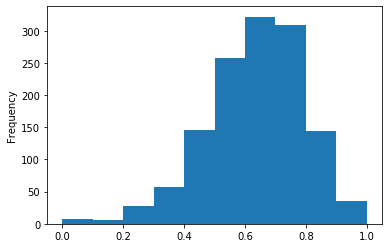

In [195]:
info_content_df['content_correct_rate'].plot.hist()

In [196]:
problem_correct = log_problem_df.groupby(['ucid','problem_number'])['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()
problem_correct.head()

,ucid,problem_number,is_correct
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,1,0.571429
1,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,2,0.473684
2,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,3,0.666667
3,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,4,0.529412
4,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,5,0.600000


In [197]:
problem_correct.rename(columns={'is_correct': 'problem_correct_rate'}, inplace=True)

In [198]:
problem_correct['problem_correct_rate']

0        0.571429
1        0.473684
2        0.666667
3        0.529412
4        0.600000
           ...   
83330    0.000000
83331    1.000000
83332    1.000000
83333    0.000000
83334    1.000000
Name: problem_correct_rate, Length: 83335, dtype: float64

In [199]:
log_problem_df = pd.merge(log_problem_df, problem_correct, how='left', on=['ucid','problem_number'])

In [200]:
log_problem_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient,proficient_correct_rate,problem_correct_rate
0,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,0,0,0,0,0.00000,0.606143
1,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,0,0,0,0,0.00000,0.702069
2,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,0,0,0,0,0.00000,0.855754
3,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,0,0,0,0,0.00000,0.787168
4,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,0,1,1,0,0.09375,0.679612


In [201]:
log_problem_df['problem_correct_rate'].describe()

count    4.273203e+06
mean     7.092223e-01
std      1.527975e-01
min      0.000000e+00
25%      6.194030e-01
50%      7.222222e-01
75%      8.161530e-01
max      1.000000e+00
Name: problem_correct_rate, dtype: float64

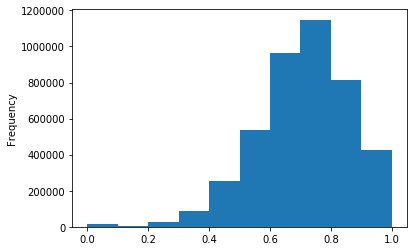

In [202]:
log_problem_df['problem_correct_rate'].plot.hist()

From the histogram above, it shows that the average problem correct rate is at 0.7 which is 70%.

In [203]:
log_problem_df.is_correct[log_problem_df['problem_correct_rate']>0.5].value_counts()

True     2858625
False     993867
Name: is_correct, dtype: int64

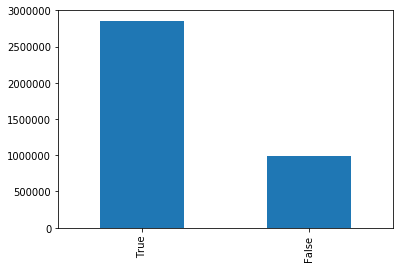

In [204]:
log_problem_df.is_correct[log_problem_df['problem_correct_rate']>0.5].value_counts().plot.bar()

In [205]:
log_problem_df.is_correct[log_problem_df['problem_correct_rate']<0.5].value_counts()

False    229945
True     153286
Name: is_correct, dtype: int64

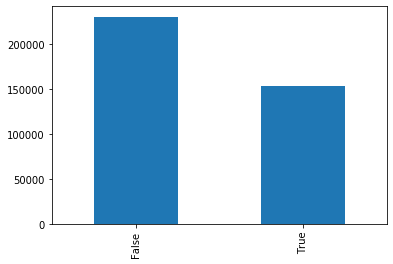

In [206]:
log_problem_df.is_correct[log_problem_df['problem_correct_rate']<0.5].value_counts().plot.bar()

## Exporting Dataframes

In [207]:
info_content_df.head()

,ucid,content_pretty_name,difficulty,learning_stage,content_correct_rate
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,1,1,0.470270
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,1,1,0.595588
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,1,1,0.653509
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,1,1,0.648058
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,1,1,0.743902


In [208]:
info_userdata_df.head()

,points,badges_cnt,date_login,user_grade,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,gender_female,...,user_city_ml,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty
uuid,,,,,,,,,,,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,18300,1,2019-01-24,1,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,6468,0,2019-01-24,1,1,False,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,4703,0,2019-01-24,1,0,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,15525,1,2019-01-24,2,0,False,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,7945,0,2019-01-24,2,1,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
log_problem_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient,proficient_correct_rate,problem_correct_rate
0,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,0,0,0,0,0.00000,0.606143
1,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,0,0,0,0,0.00000,0.702069
2,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,0,0,0,0,0.00000,0.855754
3,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,0,0,0,0,0.00000,0.787168
4,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,0,1,1,0,0.09375,0.679612


In [213]:
info_content_df.to_csv('../data/interim/Info_Content.csv', index=False)
info_userdata_df.to_csv('../data/interim/Info_UserData.csv')
log_problem_df.to_csv('../data/interim/Log_Problem.csv', index=False)